## Calculating Election Victory Probabilities Based on Party Favoribility (Logistic Regression)

### Data Collection

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New_Hampshire", 
    "New_Jersey", "New_Mexico", "New_York", "North_Carolina", "North_Dakota", "Ohio", 
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode_Island", "South_Carolina", "South_Dakota", 
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West_Virginia", 
    "Wisconsin", "Wyoming"
]


base_url = "https://en.wikipedia.org/wiki/2012_United_States_presidential_election_in_{}"

results = []

for state in states:
    district = 1
    try:
        url = base_url.format(state)
        response = requests.get(url)
        if state == "Washington":
            response = requests.get("https://en.wikipedia.org/wiki/2012_United_States_presidential_election_in_Washington_(state)")
        
        soup = BeautifulSoup(response.content, 'html.parser')

        tables = soup.find_all('table', {'class': 'wikitable'})
        
        for table in tables:
            headers = [header.text.strip() for header in table.find_all('th')]
            #print(headers)
            if "District" in headers and "Obama" in headers and "Romney" in headers:
                rows = table.find_all('tr')
                obama_index = headers.index("Obama") if "Obama" in headers else -1
                romney_index = headers.index("Romney") if "Romney" in headers else -1
                for row in rows[1:]:
                    cols = row.find_all('td')
                    if len(cols) >= 3:  
                        #district = cols[0].text.strip()
                        if obama_index < romney_index:
                            obama = cols[0].text.strip().replace('%', '')
                            romney = cols[1].text.strip().replace('%', '')
                        else:
                            romney = cols[0].text.strip().replace('%', '')
                            obama = cols[1].text.strip().replace('%', '')
                        representative = cols[2].text.strip() if len(cols) > 2 else "N/A"
                        
   
                        results.append({
                            "State": state.replace('_', ' '),
                            "District": district,
                            "Obama (%)": obama,
                            "Romney (%)": romney,
                            "Representative": representative
                        })
                        district +=1
                        print({
                            "State": state.replace('_', ' '),
                            "District": district,
                            "Obama (%)": obama,
                            "Romney (%)": romney,
                            "Representative": representative
                        })
    except Exception as e:
        print(f"Failed to process {state}: {e}")

df = pd.DataFrame(results)


df.to_csv('elections_data/2012_presidential_results_by_district.csv', index=False)

print("Scraping complete. Data saved to '2012_presidential_results_by_district.csv'.")


{'State': 'Alabama', 'District': 2, 'Obama (%)': '37.4', 'Romney (%)': '61.84', 'Representative': 'Jo Bonner'}
{'State': 'Alabama', 'District': 3, 'Obama (%)': '36.4', 'Romney (%)': '62.9', 'Representative': 'Martha Roby'}
{'State': 'Alabama', 'District': 4, 'Obama (%)': '36.8', 'Romney (%)': '62.3', 'Representative': 'Mike Rogers'}
{'State': 'Alabama', 'District': 5, 'Obama (%)': '23.98', 'Romney (%)': '74.8', 'Representative': 'Robert Aderholt'}
{'State': 'Alabama', 'District': 6, 'Obama (%)': '34.85', 'Romney (%)': '63.87', 'Representative': 'Mo Brooks'}
{'State': 'Alabama', 'District': 7, 'Obama (%)': '24.66', 'Romney (%)': '74.3', 'Representative': 'Spencer Bachus'}
{'State': 'Alabama', 'District': 8, 'Obama (%)': '72.4', 'Romney (%)': '27.12', 'Representative': 'Terri Sewell'}
{'State': 'Alaska', 'District': 2, 'Obama (%)': '40.81', 'Romney (%)': '54.80', 'Representative': 'Don Young'}
{'State': 'Arizona', 'District': 2, 'Obama (%)': '47.89', 'Romney (%)': '50.42', 'Representativ

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New_Hampshire", 
    "New_Jersey", "New_Mexico", "New_York", "North_Carolina", "North_Dakota", "Ohio", 
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode_Island", "South_Carolina", "South_Dakota", 
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West_Virginia", 
    "Wisconsin", "Wyoming"
]


base_url = "https://en.wikipedia.org/wiki/2016_United_States_presidential_election_in_{}"

results = []

for state in states:
    district = 1
    try:
        url = base_url.format(state)
        response = requests.get(url)
        if state == "Washington":
            response = requests.get("https://en.wikipedia.org/wiki/2016_United_States_presidential_election_in_Washington_(state)")
        
        soup = BeautifulSoup(response.content, 'html.parser')

        tables = soup.find_all('table', {'class': 'wikitable'})
        
        for table in tables:
            headers = [header.text.strip() for header in table.find_all('th')]
            #print(headers)
            if "District" in headers and "Trump" in headers and "Clinton" in headers:
                rows = table.find_all('tr')
                obama_index = headers.index("Trump") if "Trump" in headers else -1
                romney_index = headers.index("Clinton") if "Clinton" in headers else -1
                for row in rows[1:]:
                    cols = row.find_all('td')
                    if len(cols) >= 3:  
                        #district = cols[0].text.strip()
                        if obama_index < romney_index:
                            obama = cols[0].text.strip().replace('%', '')
                            romney = cols[1].text.strip().replace('%', '')
                        else:
                            romney = cols[0].text.strip().replace('%', '')
                            obama = cols[1].text.strip().replace('%', '')
                        representative = cols[2].text.strip() if len(cols) > 2 else "N/A"
                        
           
                        results.append({
                            "State": state.replace('_', ' '),
                            "District": district,
                            "Trump (%)": obama,
                            "Clinton (%)": romney,
                            "Representative": representative
                        })
                        district +=1
                        print({
                            "State": state.replace('_', ' '),
                            "District": district,
                            "Trump (%)": obama,
                            "Clinton (%)": romney,
                            "Representative": representative
                        })
    except Exception as e:
        print(f"Failed to process {state}: {e}")

df = pd.DataFrame(results)

df.to_csv('elections_data/2016_presidential_results_by_district.csv', index=False)

print("Scraping complete. Data saved to 'elections_data/2016_presidential_results_by_district.csv'.")

{'State': 'Alabama', 'District': 2, 'Trump (%)': '63', 'Clinton (%)': '34', 'Representative': 'Bradley Byrne'}
{'State': 'Alabama', 'District': 3, 'Trump (%)': '64', 'Clinton (%)': '33', 'Representative': 'Martha Roby'}
{'State': 'Alabama', 'District': 4, 'Trump (%)': '65', 'Clinton (%)': '32', 'Representative': 'Mike Rogers'}
{'State': 'Alabama', 'District': 5, 'Trump (%)': '80', 'Clinton (%)': '17', 'Representative': 'Robert Aderholt'}
{'State': 'Alabama', 'District': 6, 'Trump (%)': '64', 'Clinton (%)': '31', 'Representative': 'Mo Brooks'}
{'State': 'Alabama', 'District': 7, 'Trump (%)': '70', 'Clinton (%)': '26', 'Representative': 'Gary Palmer'}
{'State': 'Alabama', 'District': 8, 'Trump (%)': '29', 'Clinton (%)': '69', 'Representative': 'Terri Sewell'}
{'State': 'Alaska', 'District': 2, 'Trump (%)': '51.28', 'Clinton (%)': '36.55', 'Representative': 'Don Young'}
{'State': 'Arizona', 'District': 2, 'Trump (%)': '47', 'Clinton (%)': '46', 'Representative': 'Ann Kirkpatrick'}
{'State

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", 
    "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", 
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New_Hampshire", 
    "New_Jersey", "New_Mexico", "New_York", "North_Carolina", "North_Dakota", "Ohio", 
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode_Island", "South_Carolina", "South_Dakota", 
    "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West_Virginia", 
    "Wisconsin", "Wyoming"
]


base_url = "https://en.wikipedia.org/wiki/2020_United_States_presidential_election_in_{}"

results = []

for state in states:
    district = 1
    try:

        url = base_url.format(state)
        response = requests.get(url)
        if state == "Washington":
            response = requests.get("https://en.wikipedia.org/wiki/2020_United_States_presidential_election_in_Washington_(state)")
        
        soup = BeautifulSoup(response.content, 'html.parser')

        tables = soup.find_all('table', {'class': 'wikitable'})
        
        for table in tables:

            headers = [header.text.strip() for header in table.find_all('th')]
            #print(headers)
      
            if "District" in headers and "Trump" in headers and "Biden" in headers:
            
                rows = table.find_all('tr')
                obama_index = headers.index("Trump") if "Trump" in headers else -1
                romney_index = headers.index("Biden") if "Biden" in headers else -1
                for row in rows[1:]:
                    cols = row.find_all('td')
                    if len(cols) >= 3:  
                        #district = cols[0].text.strip()
                        if obama_index < romney_index:
                            obama = cols[0].text.strip().replace('%', '')
                            romney = cols[1].text.strip().replace('%', '')
                        else:
                            romney = cols[0].text.strip().replace('%', '')
                            obama = cols[1].text.strip().replace('%', '')
                        representative = cols[2].text.strip() if len(cols) > 2 else "N/A"
                        
                        results.append({
                            "State": state.replace('_', ' '),
                            "District": district,
                            "Trump (%)": obama,
                            "Biden (%)": romney,
                            "Representative": representative
                        })
                        district +=1
                        print({
                            "State": state.replace('_', ' '),
                            "District": district,
                            "Trump (%)": obama,
                            "Biden (%)": romney,
                            "Representative": representative
                        })
    except Exception as e:
        print(f"Failed to process {state}: {e}")


df = pd.DataFrame(results)


df.to_csv('elections_data/2020_presidential_results_by_district.csv', index=False)

print("Scraping complete. Data saved to 'elections_data/2020_presidential_results_by_district.csv'.")

{'State': 'Alabama', 'District': 2, 'Trump (%)': '64', 'Biden (%)': '35', 'Representative': 'Jerry Carl'}
{'State': 'Alabama', 'District': 3, 'Trump (%)': '64', 'Biden (%)': '35', 'Representative': 'Barry Moore'}
{'State': 'Alabama', 'District': 4, 'Trump (%)': '65', 'Biden (%)': '33', 'Representative': 'Mike Rogers'}
{'State': 'Alabama', 'District': 5, 'Trump (%)': '81', 'Biden (%)': '18', 'Representative': 'Robert Aderholt'}
{'State': 'Alabama', 'District': 6, 'Trump (%)': '62', 'Biden (%)': '36', 'Representative': 'Mo Brooks'}
{'State': 'Alabama', 'District': 7, 'Trump (%)': '67', 'Biden (%)': '31', 'Representative': 'Gary Palmer'}
{'State': 'Alabama', 'District': 8, 'Trump (%)': '28', 'Biden (%)': '71', 'Representative': 'Terri Sewell'}
{'State': 'Alaska', 'District': 2, 'Trump (%)': '52.83', 'Biden (%)': '42.77', 'Representative': 'Don Young'}
{'State': 'Arkansas', 'District': 2, 'Trump (%)': '69', 'Biden (%)': '28', 'Representative': 'Rick Crawford'}
{'State': 'Arkansas', 'Distri

In [5]:
import csv


input_file = "elections_data/2012pvi.txt" 
output_file = "elections_data/2012pvi.csv"  


with open(input_file, "r") as txt_file, open(output_file, "w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    
    for line in txt_file:
  
        row = line.strip().split("\t")  
        
       
        csv_writer.writerow(row)

print(f"Data from {input_file} has been written to {output_file}.")


Data from elections_data/2012pvi.txt has been written to elections_data/2012pvi.csv.


In [6]:
import pandas as pd


pvi_df = pd.read_csv('elections_data/2012pvi.csv')
final_2012_df = pd.read_csv('elections_data/2012_final2.csv')
final_2016_df = pd.read_csv('elections_data/2016_final3.csv')
final_2020_df = pd.read_csv('elections_data/2020_final.csv')


pvi_df.rename(columns={'District': 'District'}, inplace=True)
final_2012_df.rename(columns={'District': 'District'}, inplace=True)
final_2016_df.rename(columns={'District': 'District'}, inplace=True)
final_2020_df.rename(columns={'District': 'District'}, inplace=True)


merged_df = pd.merge(pvi_df, final_2012_df[['State', 'District', 'Obama (%)', 'Romney (%)']],
                     on=['State', 'District'], how='left')
merged_df = pd.merge(merged_df, final_2016_df[['State', 'District', 'Trump_one (%)', 'Clinton (%)']],
                     on=['State', 'District'], how='left')
merged_df = pd.merge(merged_df, final_2020_df[['State', 'District', 'Trump_two (%)', 'Biden (%)']],
                     on=['State', 'District'], how='left')

merged_df.rename(columns={
    'Obama (%)': '2012 Obama (%)',
    'Romney (%)': '2012 Romney (%)',
    'Trump_one (%)': '2016 Trump (%)',
    'Clinton (%)': '2016 Clinton (%)',
    'Trump_two (%)': '2020 Trump (%)',
    'Biden (%)': '2020 Biden (%)'
}, inplace=True)


output_file = 'elections_data/merged_districts.csv'
merged_df.to_csv(output_file, index=False)


## Building Logistic Regression Model

### Unstandardized Model

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('elections_data/merged_districts.csv')


def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', 'Cook_PVI_Numeric'])

data['Republican_Win_2012'] = np.where(data['2012 Romney (%)'] > data['2012 Obama (%)'], 1, 0)
data['Republican_Win_2016'] = np.where(data['2016 Trump (%)'] > data['2016 Clinton (%)'], 1, 0)

X = data[['Cook_PVI_Numeric']]
y_2012 = data['Republican_Win_2012']
X_train, X_test, y_train, y_test = train_test_split(X, y_2012, test_size=0.1, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

data['Republican_Prob_2012'] = log_reg.predict_proba(X)[:, 1]

y_2016 = data['Republican_Win_2016']
log_reg.fit(X, y_2016)
data['Republican_Prob_2016'] = log_reg.predict_proba(X)[:, 1]


data[['State', 'District', 'Cook_PVI_Numeric', 'Republican_Prob_2012', 'Republican_Prob_2016']].to_csv('elections_data/logistic_regression_results.csv', index=False)

print("Logistic regression completed. Results saved.")

Logistic regression completed. Results saved.


/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


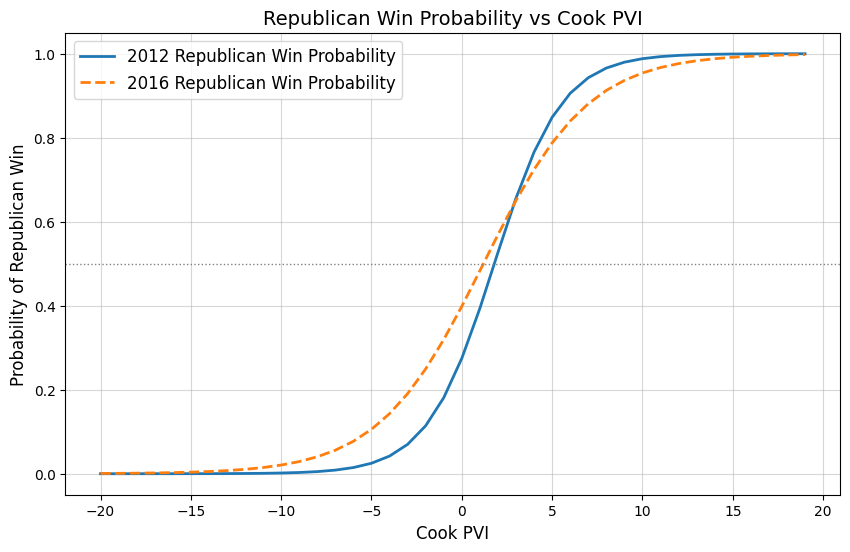

In [8]:

data = pd.read_csv('elections_data/merged_districts.csv')

def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', 'Cook_PVI_Numeric'])

data['Republican_Win_2012'] = np.where(data['2012 Romney (%)'] > data['2012 Obama (%)'], 1, 0)
data['Republican_Win_2016'] = np.where(data['2016 Trump (%)'] > data['2016 Clinton (%)'], 1, 0)

# logistic Regression for 2012
X = data[['Cook_PVI_Numeric']]
y_2012 = data['Republican_Win_2012']

log_reg_2012 = LogisticRegression()
log_reg_2012.fit(X, y_2012)

# logistic Regression for 2016
y_2016 = data['Republican_Win_2016']
log_reg_2016 = LogisticRegression()
log_reg_2016.fit(X, y_2016)


pvi_range = np.arange(-20, 20, 1).reshape(-1, 1)
probabilities_2012 = log_reg_2012.predict_proba(pvi_range)[:, 1]
probabilities_2016 = log_reg_2016.predict_proba(pvi_range)[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(pvi_range, probabilities_2012, label='2012 Republican Win Probability', linewidth=2)
plt.plot(pvi_range, probabilities_2016, label='2016 Republican Win Probability', linewidth=2, linestyle='--')
plt.title('Republican Win Probability vs Cook PVI', fontsize=14)
plt.xlabel('Cook PVI', fontsize=12)
plt.ylabel('Probability of Republican Win', fontsize=12)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with featur

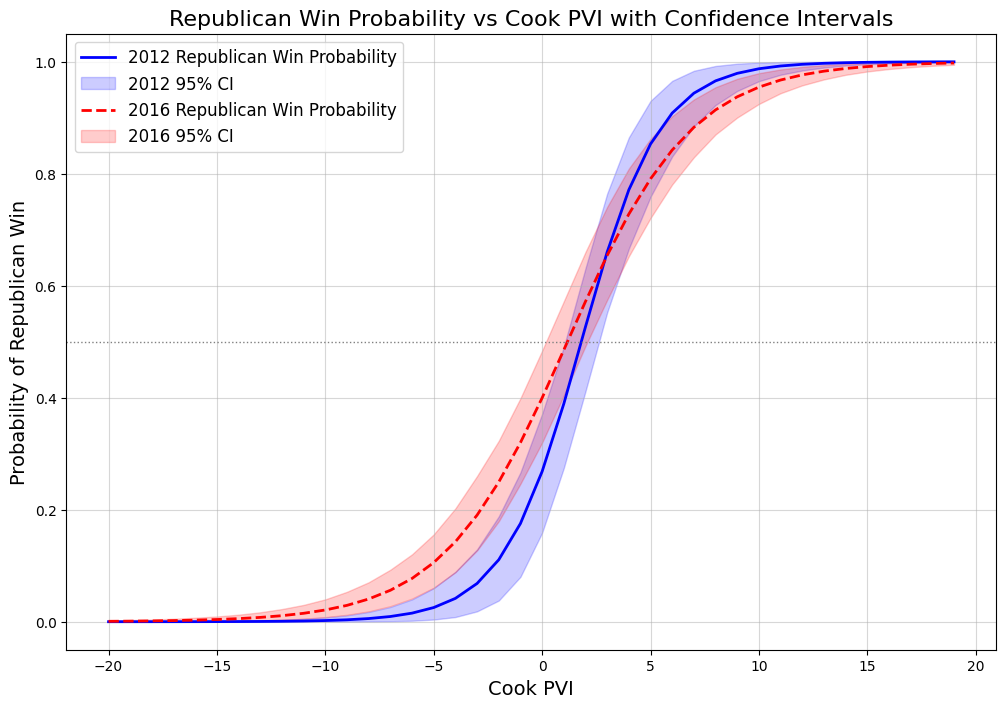

In [9]:

data = pd.read_csv('elections_data/merged_districts.csv')

def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', 'Cook_PVI_Numeric'])


data['Republican_Win_2012'] = np.where(data['2012 Romney (%)'] > data['2012 Obama (%)'], 1, 0)
data['Republican_Win_2016'] = np.where(data['2016 Trump (%)'] > data['2016 Clinton (%)'], 1, 0)

X = data[['Cook_PVI_Numeric']]
y_2012 = data['Republican_Win_2012']

log_reg_2012 = LogisticRegression()
log_reg_2012.fit(X, y_2012)

y_2016 = data['Republican_Win_2016']
log_reg_2016 = LogisticRegression()
log_reg_2016.fit(X, y_2016)

pvi_range = np.arange(-20, 20, 1).reshape(-1, 1)

n_bootstrap = 1000
probabilities_2012_samples = []
probabilities_2016_samples = []

for _ in range(n_bootstrap):
    boot_indices = np.random.choice(len(data), len(data), replace=True)
    boot_X = X.iloc[boot_indices]
    boot_y_2012 = y_2012.iloc[boot_indices]
    boot_y_2016 = y_2016.iloc[boot_indices]
    
    boot_log_reg_2012 = LogisticRegression()
    boot_log_reg_2012.fit(boot_X, boot_y_2012)
    boot_log_reg_2016 = LogisticRegression()
    boot_log_reg_2016.fit(boot_X, boot_y_2016)
    
    probabilities_2012_samples.append(boot_log_reg_2012.predict_proba(pvi_range)[:, 1])
    probabilities_2016_samples.append(boot_log_reg_2016.predict_proba(pvi_range)[:, 1])

probabilities_2012_samples = np.array(probabilities_2012_samples)
probabilities_2016_samples = np.array(probabilities_2016_samples)

mean_prob_2012 = probabilities_2012_samples.mean(axis=0)
mean_prob_2016 = probabilities_2016_samples.mean(axis=0)

ci_lower_2012 = np.percentile(probabilities_2012_samples, 2.5, axis=0)
ci_upper_2012 = np.percentile(probabilities_2012_samples, 97.5, axis=0)

ci_lower_2016 = np.percentile(probabilities_2016_samples, 2.5, axis=0)
ci_upper_2016 = np.percentile(probabilities_2016_samples, 97.5, axis=0)

plt.figure(figsize=(12, 8))
plt.plot(pvi_range, mean_prob_2012, label='2012 Republican Win Probability', color='blue', linewidth=2)
plt.fill_between(pvi_range.ravel(), ci_lower_2012, ci_upper_2012, color='blue', alpha=0.2, label='2012 95% CI')
plt.plot(pvi_range, mean_prob_2016, label='2016 Republican Win Probability', color='red', linewidth=2, linestyle='--')
plt.fill_between(pvi_range.ravel(), ci_lower_2016, ci_upper_2016, color='red', alpha=0.2, label='2016 95% CI')
plt.title('Republican Win Probability vs Cook PVI with Confidence Intervals', fontsize=16)
plt.xlabel('Cook PVI', fontsize=14)
plt.ylabel('Probability of Republican Win', fontsize=14)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


### Standardized Models

In [10]:
import pandas as pd
import numpy as np

data = pd.read_csv('elections_data/merged_districts.csv')

def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', 'Cook_PVI_Numeric'])

data['2012 Romney (Standardized)'] = data['2012 Romney (%)'] / (data['2012 Romney (%)'] + data['2012 Obama (%)'])
data['2012 Obama (Standardized)'] = data['2012 Obama (%)'] / (data['2012 Romney (%)'] + data['2012 Obama (%)'])

data['Movement_2012'] = data['2012 Romney (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)

mean_movement_2012 = data['Movement_2012'].mean()

data['Adjusted_2012_Romney'] = data['2012 Romney (Standardized)'] - mean_movement_2012
data['Adjusted_2012_Obama'] = 1 - data['Adjusted_2012_Romney']

data['2016 Trump (Standardized)'] = data['2016 Trump (%)'] / (data['2016 Trump (%)'] + data['2016 Clinton (%)'])
data['2016 Clinton (Standardized)'] = data['2016 Clinton (%)'] / (data['2016 Trump (%)'] + data['2016 Clinton (%)'])

data[['State', 'District', 'Cook_PVI_Numeric', 'Adjusted_2012_Romney', 'Adjusted_2012_Obama',
      '2016 Trump (Standardized)', '2016 Clinton (Standardized)']].to_csv('elections_data/standardized_results.csv', index=False)

print("Results have been standardized and saved to 'standardized_results.csv'.")


Results have been standardized and saved to 'standardized_results.csv'.


/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


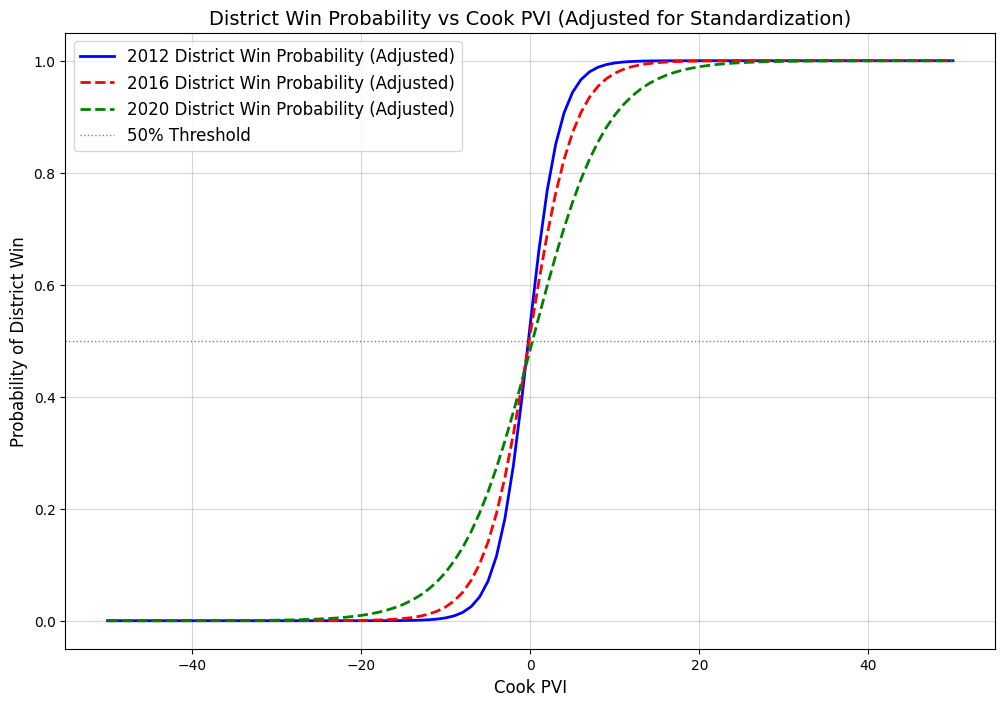

Logistic regression completed. Results saved to 'standardized_adjusted_results_with_logistic.csv'.


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data = pd.read_csv('elections_data/merged_districts.csv')

def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')
data['2020 Trump (%)'] = pd.to_numeric(data['2020 Trump (%)'], errors='coerce')
data['2020 Biden (%)'] = pd.to_numeric(data['2020 Biden (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', '2020 Trump (%)', '2020 Biden (%)','Cook_PVI_Numeric'])

data['2012 Romney (Standardized)'] = data['2012 Romney (%)'] / (data['2012 Romney (%)'] + data['2012 Obama (%)'])
data['2016 Trump (Standardized)'] = data['2016 Trump (%)'] / (data['2016 Trump (%)'] + data['2016 Clinton (%)'])
data['2020 Trump (Standardized)'] = data['2020 Trump (%)'] / (data['2020 Trump (%)'] + data['2020 Biden (%)'])

data['Movement_2012'] = data['2012 Romney (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2012 = data['Movement_2012'].mean()
data['Adjusted_2012_Romney'] = data['2012 Romney (Standardized)'] - mean_movement_2012

data['Movement_2016'] = data['2016 Trump (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2016 = data['Movement_2016'].mean()
data['Adjusted_2016_Trump'] = data['2016 Trump (Standardized)'] - mean_movement_2016

data['Movement_2020'] = data['2020 Trump (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2020 = data['Movement_2020'].mean()
data['Adjusted_2020_Trump'] = data['2020 Trump (Standardized)'] - mean_movement_2020


data['Republican_Win_2012'] = np.where(data['Adjusted_2012_Romney'] > 0.5, 1, 0)
data['Republican_Win_2016'] = np.where(data['Adjusted_2016_Trump'] > 0.5, 1, 0)
data['Republican_Win_2020'] = np.where(data['Adjusted_2020_Trump'] > 0.5, 1, 0)


X = data[['Cook_PVI_Numeric']]
y_2012 = data['Republican_Win_2012']
log_reg_2012 = LogisticRegression()
log_reg_2012.fit(X, y_2012)


y_2016 = data['Republican_Win_2016']
log_reg_2016 = LogisticRegression()
log_reg_2016.fit(X, y_2016)


y_2020 = data['Republican_Win_2020']
log_reg_2020 = LogisticRegression()
log_reg_2020.fit(X, y_2020)

pvi_range = np.arange(-50, 51, 1).reshape(-1, 1)
probabilities_2012 = log_reg_2012.predict_proba(pvi_range)[:, 1]
probabilities_2016 = log_reg_2016.predict_proba(pvi_range)[:, 1]
probabilities_2020 = log_reg_2020.predict_proba(pvi_range)[:, 1]

plt.figure(figsize=(12, 8))
plt.plot(pvi_range, probabilities_2012, label='2012 District Win Probability (Adjusted)', linewidth=2, color='blue')
plt.plot(pvi_range, probabilities_2016, label='2016 District Win Probability (Adjusted)', linewidth=2, linestyle='--', color='red')
plt.plot(pvi_range, probabilities_2020, label='2020 District Win Probability (Adjusted)', linewidth=2, linestyle='--', color='green')
plt.title('District Win Probability vs Cook PVI (Adjusted for Standardization)', fontsize=14)
plt.xlabel('Cook PVI', fontsize=12)
plt.ylabel('Probability of District Win', fontsize=12)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1, label="50% Threshold")
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

data[['State', 'District', 'Cook_PVI_Numeric', 'Adjusted_2012_Romney', 'Adjusted_2016_Trump',
      '2012 Romney (Standardized)', '2016 Trump (Standardized)']].to_csv('elections_data/standardized_adjusted_results_with_logistic.csv', index=False)

print("Logistic regression completed. Results saved to 'standardized_adjusted_results_with_logistic.csv'.")



In [12]:
coef_2012 = log_reg_2012.coef_[0]  
intercept_2012 = log_reg_2012.intercept_[0]

print("2012 Logistic Regression Coefficient:", coef_2012)
print("2012 Logistic Regression Intercept:", intercept_2012)

2012 Logistic Regression Coefficient: [0.53967689]
2012 Logistic Regression Intercept: 0.11917829336393383


In [13]:
coef_2016 = log_reg_2016.coef_[0]  
intercept_2016 = log_reg_2016.intercept_[0]

print("2016 Logistic Regression Coefficient:", coef_2016)
print("2016 Logistic Regression Intercept:", intercept_2016)

2016 Logistic Regression Coefficient: [0.37284623]
2016 Logistic Regression Intercept: 0.05111949125823674


In [14]:
coef_2020 = log_reg_2020.coef_[0] 
intercept_2020 = log_reg_2020.intercept_[0]

print("2020 Logistic Regression Coefficient:", coef_2020)
print("2020 Logistic Regression Intercept:", intercept_2020)

2020 Logistic Regression Coefficient: [0.22922142]
2020 Logistic Regression Intercept: -0.06183973877611049


/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


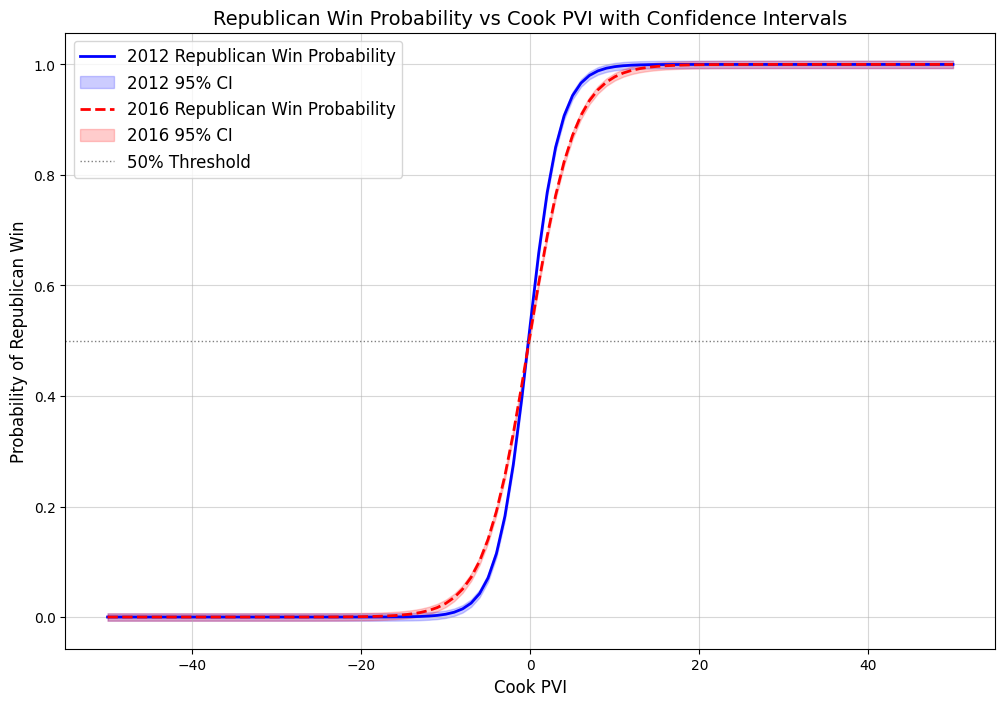

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data = pd.read_csv('elections_data/merged_districts.csv')

def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')
data['2020 Trump (%)'] = pd.to_numeric(data['2020 Trump (%)'], errors='coerce')
data['2020 Biden (%)'] = pd.to_numeric(data['2020 Biden (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', '2020 Trump (%)', '2020 Biden (%)','Cook_PVI_Numeric'])

data['2012 Romney (Standardized)'] = data['2012 Romney (%)'] / (data['2012 Romney (%)'] + data['2012 Obama (%)'])
data['2016 Trump (Standardized)'] = data['2016 Trump (%)'] / (data['2016 Trump (%)'] + data['2016 Clinton (%)'])
data['2020 Trump (Standardized)'] = data['2020 Trump (%)'] / (data['2020 Trump (%)'] + data['2020 Biden (%)'])


data['Movement_2012'] = data['2012 Romney (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2012 = data['Movement_2012'].mean()
data['Adjusted_2012_Romney'] = data['2012 Romney (Standardized)'] - mean_movement_2012

data['Movement_2016'] = data['2016 Trump (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2016 = data['Movement_2016'].mean()
data['Adjusted_2016_Trump'] = data['2016 Trump (Standardized)'] - mean_movement_2016

data['Movement_2020'] = data['2020 Trump (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2020 = data['Movement_2020'].mean()
data['Adjusted_2020_Trump'] = data['2020 Trump (Standardized)'] - mean_movement_2020

data['Republican_Win_2012'] = np.where(data['Adjusted_2012_Romney'] > 0.5, 1, 0)
data['Republican_Win_2016'] = np.where(data['Adjusted_2016_Trump'] > 0.5, 1, 0)
data['Republican_Win_2020'] = np.where(data['Adjusted_2020_Trump'] > 0.5, 1, 0)

X = data[['Cook_PVI_Numeric']]
y_2012 = data['Republican_Win_2012']
log_reg_2012 = LogisticRegression()
log_reg_2012.fit(X, y_2012)

y_2016 = data['Republican_Win_2016']
log_reg_2016 = LogisticRegression()
log_reg_2016.fit(X, y_2016)

y_2020 = data['Republican_Win_2020']
log_reg_2020 = LogisticRegression()
log_reg_2020.fit(X, y_2020)

pvi_range = np.arange(-50, 51, 1).reshape(-1, 1)

probabilities_2012 = log_reg_2012.predict_proba(pvi_range)[:, 1]
coefficients_2012 = log_reg_2012.coef_[0]
intercept_2012 = log_reg_2012.intercept_[0]
covariance_2012 = np.linalg.inv(np.dot(X.T, X)) * log_reg_2012.C  

std_error_2012 = np.sqrt(np.diag(covariance_2012))
z_value = 1.96  
upper_2012 = probabilities_2012 + z_value * std_error_2012
lower_2012 = probabilities_2012 - z_value * std_error_2012

probabilities_2016 = log_reg_2016.predict_proba(pvi_range)[:, 1]
coefficients_2016 = log_reg_2016.coef_[0]
intercept_2016 = log_reg_2016.intercept_[0]
covariance_2016 = np.linalg.inv(np.dot(X.T, X)) * log_reg_2016.C 

std_error_2016 = np.sqrt(np.diag(covariance_2016))
upper_2016 = probabilities_2016 + z_value * std_error_2016
lower_2016 = probabilities_2016 - z_value * std_error_2016


probabilities_2016 = log_reg_2016.predict_proba(pvi_range)[:, 1]
coefficients_2016 = log_reg_2016.coef_[0]
intercept_2016 = log_reg_2016.intercept_[0]
covariance_2016 = np.linalg.inv(np.dot(X.T, X)) * log_reg_2016.C 


std_error_2016 = np.sqrt(np.diag(covariance_2016))
upper_2016 = probabilities_2016 + z_value * std_error_2016
lower_2016 = probabilities_2016 - z_value * std_error_2016

plt.figure(figsize=(12, 8))
plt.plot(pvi_range, probabilities_2012, label='2012 Republican Win Probability', linewidth=2, color='blue')
plt.fill_between(pvi_range.flatten(), lower_2012, upper_2012, color='blue', alpha=0.2, label='2012 95% CI')
plt.plot(pvi_range, probabilities_2016, label='2016 Republican Win Probability', linewidth=2, linestyle='--', color='red')
plt.fill_between(pvi_range.flatten(), lower_2016, upper_2016, color='red', alpha=0.2, label='2016 95% CI')
plt.title('Republican Win Probability vs Cook PVI with Confidence Intervals', fontsize=14)
plt.xlabel('Cook PVI', fontsize=12)
plt.ylabel('Probability of Republican Win', fontsize=12)
plt.axhline(y=0.5, color='gray', linestyle=':', linewidth=1, label="50% Threshold")
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/ivansinyavin/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


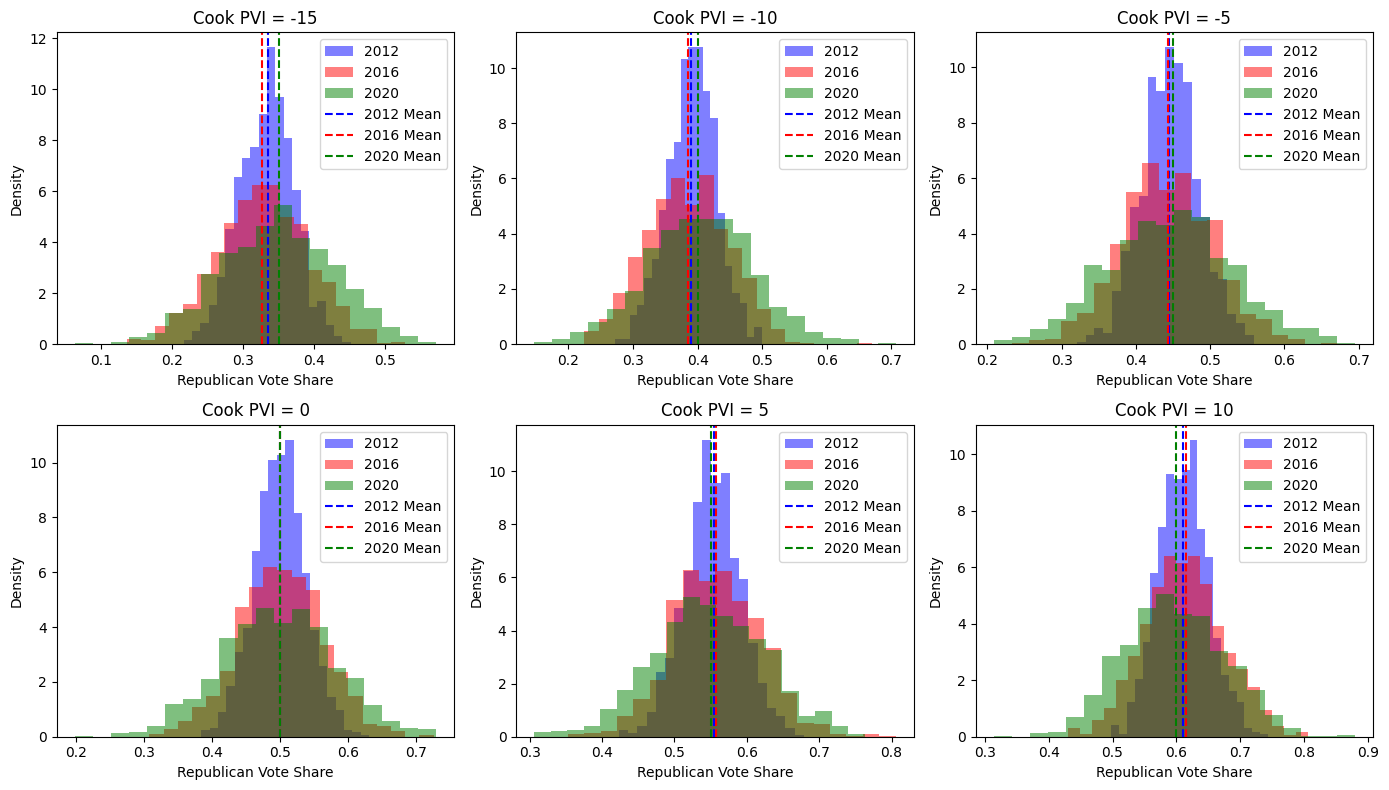

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('elections_data/merged_districts.csv')

def parse_pvi(pvi):
    if isinstance(pvi, str):
        if 'R+' in pvi:
            return int(pvi.split('+')[1])
        elif 'D+' in pvi:
            return -int(pvi.split('+')[1])
        elif 'EVEN' in pvi:
            return 0
    return np.nan

data['Cook_PVI_Numeric'] = data['2012 PVI'].apply(parse_pvi)

data['2012 Romney (%)'] = pd.to_numeric(data['2012 Romney (%)'], errors='coerce')
data['2012 Obama (%)'] = pd.to_numeric(data['2012 Obama (%)'], errors='coerce')
data['2016 Trump (%)'] = pd.to_numeric(data['2016 Trump (%)'], errors='coerce')
data['2016 Clinton (%)'] = pd.to_numeric(data['2016 Clinton (%)'], errors='coerce')
data['2020 Trump (%)'] = pd.to_numeric(data['2020 Trump (%)'], errors='coerce')
data['2020 Biden (%)'] = pd.to_numeric(data['2020 Biden (%)'], errors='coerce')

data = data.dropna(subset=['2012 Romney (%)', '2012 Obama (%)', '2016 Trump (%)', '2016 Clinton (%)', '2020 Trump (%)', '2020 Biden (%)','Cook_PVI_Numeric'])

data['2012 Romney (Standardized)'] = data['2012 Romney (%)'] / (data['2012 Romney (%)'] + data['2012 Obama (%)'])
data['2016 Trump (Standardized)'] = data['2016 Trump (%)'] / (data['2016 Trump (%)'] + data['2016 Clinton (%)'])
data['2020 Trump (Standardized)'] = data['2020 Trump (%)'] / (data['2020 Trump (%)'] + data['2020 Biden (%)'])


data['Movement_2012'] = data['2012 Romney (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2012 = data['Movement_2012'].mean()
data['Adjusted_2012_Romney'] = data['2012 Romney (Standardized)'] - mean_movement_2012

data['Movement_2016'] = data['2016 Trump (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2016 = data['Movement_2016'].mean()
data['Adjusted_2016_Trump'] = data['2016 Trump (Standardized)'] - mean_movement_2016

data['Movement_2020'] = data['2020 Trump (Standardized)'] - (0.5 + data['Cook_PVI_Numeric'] / 100)
mean_movement_2020 = data['Movement_2020'].mean()
data['Adjusted_2020_Trump'] = data['2020 Trump (Standardized)'] - mean_movement_2020



X = data[['Cook_PVI_Numeric']]
y_2012 = data['Adjusted_2012_Romney']
y_2016 = data['Adjusted_2016_Trump']
y_2020 = data['Adjusted_2020_Trump']

reg_2012 = LinearRegression()
reg_2012.fit(X, y_2012)

reg_2016 = LinearRegression()
reg_2016.fit(X, y_2016)

reg_2020 = LinearRegression()
reg_2020.fit(X, y_2020)


data['Residual_2012'] = y_2012 - reg_2012.predict(X)
data['Residual_2016'] = y_2016 - reg_2016.predict(X)
data['Residual_2020'] = y_2020 - reg_2020.predict(X)

variance_2012 = data['Residual_2012'].var()
variance_2016 = data['Residual_2016'].var()
variance_2020 = data['Residual_2020'].var()

pvi_range = np.arange(-50, 51, 1).reshape(-1, 1)
mean_2012 = reg_2012.predict(pvi_range)
mean_2016 = reg_2016.predict(pvi_range)
mean_2020 = reg_2020.predict(pvi_range)

np.random.seed(42)
simulations_2012 = [np.random.normal(mu, np.sqrt(variance_2012), 1000) for mu in mean_2012]
simulations_2016 = [np.random.normal(mu, np.sqrt(variance_2016), 1000) for mu in mean_2016]
simulations_2020 = [np.random.normal(mu, np.sqrt(variance_2020), 1000) for mu in mean_2020]

plt.figure(figsize=(14, 8))
for i, pvi in enumerate([-15, -10, -5, 0, 5, 10]):
    plt.subplot(2, 3, i + 1)
    plt.hist(simulations_2012[pvi + 50], bins=20, alpha=0.5, label='2012', color='blue', density=True)
    plt.hist(simulations_2016[pvi + 50], bins=20, alpha=0.5, label='2016', color='red', density=True)
    plt.hist(simulations_2020[pvi + 50], bins=20, alpha=0.5, label='2020', color='green', density=True)
    plt.axvline(mean_2012[pvi + 50], color='blue', linestyle='--', label=f'2012 Mean')
    plt.axvline(mean_2016[pvi + 50], color='red', linestyle='--', label=f'2016 Mean')
    plt.axvline(mean_2020[pvi + 50], color='green', linestyle='--', label=f'2020 Mean')
    plt.title(f'Cook PVI = {pvi}')
    plt.xlabel('Republican Vote Share')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
